In [ ]:
# Deep Learning Assignment1
## Author: Xiao jing(xj655)

In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

# 1. Full, slice, fill
Write a function `warm_up` that returns the 2D tensor with integers below. **Do not use any loops**.

```
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 3 3 1 2 1 3 3 1 2 1
1 2 1 1 1 1 2 1 1 1 1 2 1
2 2 2 2 2 2 2 2 2 2 2 2 2
1 2 1 1 1 1 2 1 1 1 1 2 1
```


Hint: Use `torch.full`, `torch.fill_`, and the slicing operator.

In [4]:
def warm_up():
    t=torch.full([13,13],1,dtype=torch.int)
    #or
    #t = torch.Tensor(13,13)
    #t.fill_(1)
    #t = t.byte()
    
    t[:, 1] = 2
    t[:, 6] = 2
    t[:, 11] = 2
    t[1, :] = 2
    t[6, :] = 2
    t[11, :] = 2
    t[3:5, 3:5] = 3
    t[8:10, 3:5] = 3
    t[3:5, 8:10] = 3
    t[8:10, 8:10] = 3
    return t
    raise NotImplementedError('Not Implemented Error')

# Uncomment line below once you implement this function. 
print(warm_up())

tensor([[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 2, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1]], dtype=torch.int32)


# 2. To Loop or not to loop

## 2.1. `mul_row_loop`
Write a function `mul_row_loop`, using python loops (and not even slicing operators), that gets a 2D tensor
as input, and returns a tensor of same size, equal to the one given as argument, with the first row
kept unchanged, the second multiplied by two, the third by three, etc.
For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

In [5]:
def mul_row_loop(input_tensor):
    a = input_tensor
    for i in range(1,a.size(0)+1):
        a[i-1,:] = a[i-1,:]*i
    return a
    raise NotImplementedError('Not Implemented Error')
    
t = torch.full((4, 8), 2.0)
print(mul_row_loop(t))

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])


# 2.2. `mul_row_fast`
Write a second version of the same function named `mul_row_fast` which uses tensor operations and no looping.

**Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

In [6]:
def mul_row_fast(input_tensor):
    a = input_tensor
    dim_0 = a.size(0)
    c = torch.arange(1.0,dim_0+1.0).resize(1,dim_0).t() #need to keep input and other matrix having the same dtype
    b = torch.mul(a,c)
    
    return b
    raise NotImplementedError('Not Implemented Error')
    
t = torch.full((4, 8), 2.0)
print(mul_row_fast(t))

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])


/anaconda3/lib/python3.6/site-packages/torch/tensor.py:263: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


# 2.3. `times`
Write a function `times` which takes a 2D tensor as input and returns the run times of `mul_row_loop` and `mul_row_fast` on this tensor, respectively. Use `time.perf_counter`.

Use `torch.ones` to create a 2D tensor of size (1000, 400) full of ones and run `times` on it (there should be more than two orders of magnitude difference).

In [7]:
import time
from time import perf_counter
#torch.manual_seed(seed)
def times(input_tensor):
    tstart = perf_counter()
    a = mul_row_loop(input_tensor)
    t1 = perf_counter()
    time.__init__
    b = mul_row_fast(input_tensor)
    t2 = perf_counter()
    
    time_loop = t1 - tstart
    time_fast = t2 - t1
    return time_loop,time_fast
    raise NotImplementedError()

# Uncomment lines below once you implement this function. 
input_tensor = torch.ones(1000,400)
time_1, time_2 = times(input_tensor)
print('{}, {}'.format(time_1, time_2))

0.011407080106437206, 0.0031084090005606413


/anaconda3/lib/python3.6/site-packages/torch/tensor.py:263: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


# 3. Non-linearities

## 3.1. ReLU
ReLU (Rectified Linear Unit) is a non-linear activation fuction defined as:

$$y = \mathrm{max}(0,x)$$

Define a fully connected neural network `linear_fc_relu` which:（No weights share MLP)
- takes 2 dimensional data as input and passes it through linear modules (`torch.nn.Linear`)
- has one hidden layer of dimension 5 
- has output dimension of 2
- has ReLu as an activation function

Create a tensor with input data $X$ of size (100, 2) using `torch.randn`. 

Following the example in https://github.com/Atcold/pytorch-Deep-Learning-Minicourse/blob/master/02-space_stretching.ipynb, visualize the output of passing `X` through the neural network `linear_fc_relu`.

In [8]:
set_default()

In [9]:
# Input data
X = torch.randn(100,2)

In [10]:
# Input data
# X = torch.randn(100,2)
# create 1-layer neural networks with ReLU activation
# linear_fc_relu = TODO
# Visualize: TODO

None


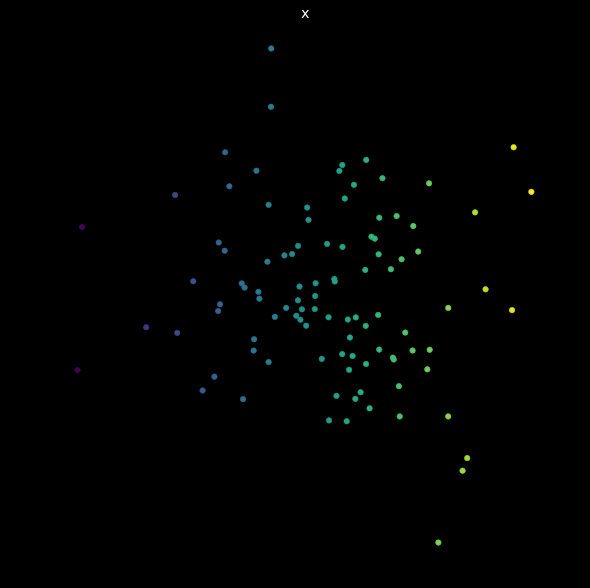

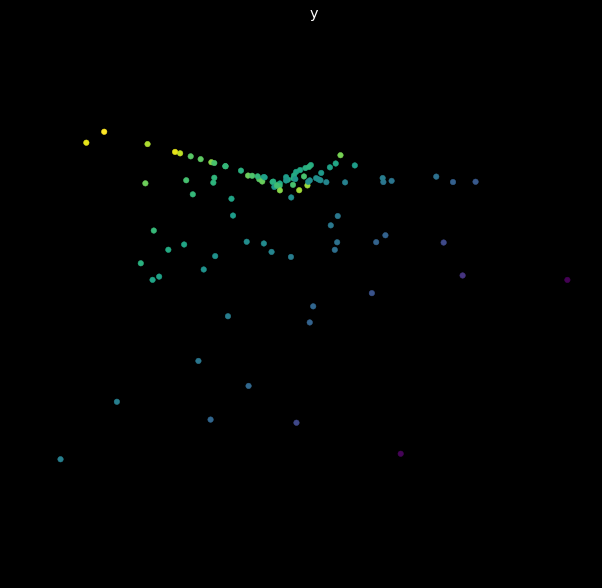

In [11]:
#torch.manual_seed(seed)
def linear_fc_relu(t):
    colors = t[:, 0]
    show_scatterplot(t, colors, title='x')
    
    model = nn.Sequential(
        nn.Linear(2, 5, bias=False),
        nn.ReLU(),
        nn.Linear(5, 2, bias=False)
    )
    model.to(device)
    with torch.no_grad():
        y = model(t)
    show_scatterplot(y, colors, title='y')
    
X = torch.randn(100,2)
print(linear_fc_relu(X))

## 3.2. Sigmoid
The sigmoid function is another popular choice for a non-linear activation function which maps its input to values in the interval $(0,1)$. It is formally defined as:

$$\sigma(x) = \frac{1}{1+ e^{-x}}$$

Define a new neural network `linear_fc_sigmoid` which is the same architecture as in part `3.1.` but with a sigmoid unit instead of ReLU. 

Using the same $X$ as in part `3.1`, visualize the output of passing `X` through the neural network `linear_fc_sigmoid`.

In [12]:
# create 1-layer neural networks with Sigmoid activation
# linear_fc_sigmoid = TODO
# Visualize: TODO

None


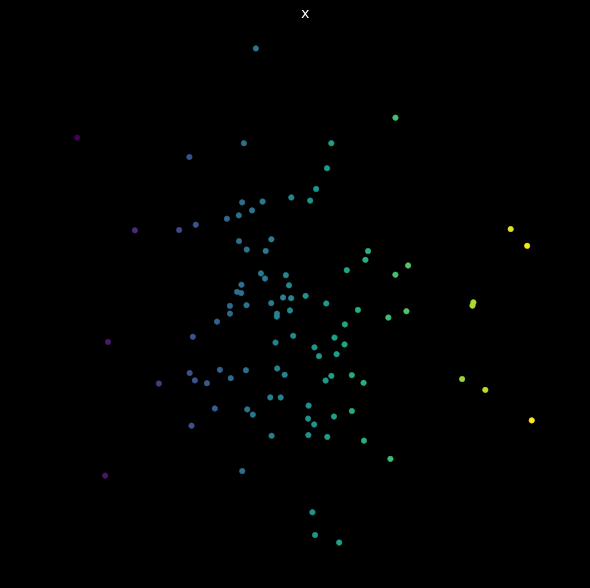

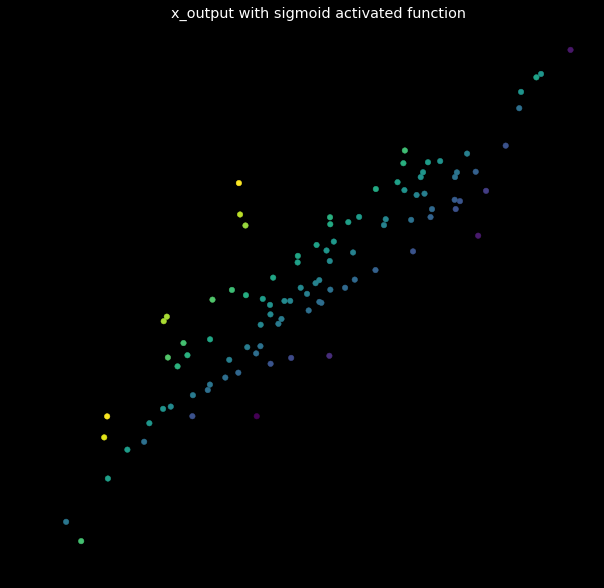

In [13]:
#torch.manual_seed(seed)
def linear_fc_sigmoid(t):
    colors = t[:, 0]
    show_scatterplot(t, colors, title='x')
    
    model = nn.Sequential(
        nn.Linear(2, 5, bias=False),
        nn.Sigmoid(),
        nn.Linear(5, 2, bias=False)
    )
    model.to(device)
    with torch.no_grad():
        y = model(t)
    show_scatterplot(y, colors, title='x_output with sigmoid activated function')
    
X = torch.randn(100,2)
print(linear_fc_sigmoid(X))